In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from datetime import date
from workalendar.europe import UnitedKingdom

warnings.filterwarnings("ignore")

In [114]:
betting_odds_df = pd.DataFrame()
# Load the data
for filename in os.listdir():
    if filename.endswith('.csv'):
        data = pd.read_csv(filename)
        betting_odds_df = pd.concat([betting_odds_df, data])

betting_odds_df = betting_odds_df.drop(columns=['Div'])

In [115]:
# extract day and month from Date
betting_odds_df['Date'] = pd.to_datetime(betting_odds_df['Date'], dayfirst=True)
betting_odds_df = betting_odds_df[['Date', 'HomeTeam', 'AwayTeam', 'PSCH', 'PSCD', 'PSCA']].reset_index(drop=True)
betting_odds_df

,Date,HomeTeam,AwayTeam,PSCH,PSCD,PSCA
0,2017-08-11,Arsenal,Leicester,1.49,4.73,7.25
1,2017-08-12,Brighton,Man City,11.75,6.15,1.29
2,2017-08-12,Chelsea,Burnley,1.33,5.40,12.25
3,2017-08-12,Crystal Palace,Huddersfield,1.79,3.56,5.51
4,2017-08-12,Everton,Stoke,1.82,3.49,5.42
...,...,...,...,...,...,...
1515,2024-05-19,Crystal Palace,Aston Villa,1.63,4.64,4.99
1516,2024-05-19,Liverpool,Wolves,1.13,10.69,16.27
1517,2024-05-19,Luton,Fulham,3.11,3.99,2.19
1518,2024-05-19,Man City,West Ham,1.07,15.01,27.84


In [116]:
team_mapping = {
    'Bournemouth': 'AFC Bournemouth',
    'Arsenal': 'Arsenal',
    'Aston Villa': 'Aston Villa',
    'Brentford': 'Brentford',
    'Brighton': 'Brighton & Hove Albion',
    'Burnley': 'Burnley',
    'Cardiff': 'Cardiff City',
    'Chelsea': 'Chelsea',
    'Crystal Palace': 'Crystal Palace',
    'Everton': 'Everton',
    'Fulham': 'Fulham',
    'Huddersfield': 'Huddersfield Town',
    'Leeds': 'Leeds United',
    'Leicester': 'Leicester City',
    'Liverpool': 'Liverpool',
    'Luton': 'Luton Town',
    'Man City': 'Manchester City',
    'Man United': 'Manchester United',
    'Newcastle': 'Newcastle United',
    "Nott'm Forest": 'Nottingham Forest',
    'Sheffield United': 'Sheffield United',
    'Southampton': 'Southampton',
    'Stoke': 'Stoke City',
    'Swansea': 'Swansea City',
    'Tottenham': 'Tottenham Hotspur',
    'Watford': 'Watford',
    'West Brom': 'West Bromwich Albion',
    'West Ham': 'West Ham United',
    'Wolves': 'Wolverhampton Wanderers'
}

betting_odds_df['HomeTeam'] = betting_odds_df['HomeTeam'].map(team_mapping)
betting_odds_df['AwayTeam'] = betting_odds_df['AwayTeam'].map(team_mapping)

In [117]:
def construct_seasons(folders):
    season_df = pd.DataFrame()
    for folder in folders:
        for file in os.listdir(folder):
            month_df = pd.read_csv(folder + '/' + file, encoding = 'unicode_escape')
            month_df['Date'] = pd.to_datetime(month_df['Date'], dayfirst=True)
            # drop rows with missing date
            month_df = month_df.dropna(subset=['Date', 'Status'])
            month_df = month_df.drop(columns = ["Status"])
            month_df.columns = ['Date', 'HomeTeam', 'HomeTeam_goals', 'AwayTeam_goals', 'AwayTeam', 'Attendance']
            month_df['FTR'] = month_df.apply(lambda x: 'H' if x['HomeTeam_goals'] > x['AwayTeam_goals'] else ('A' if x['HomeTeam_goals'] < x['AwayTeam_goals'] else 'D'), axis=1)
            month_df['Attendance'] = month_df['Attendance'].str.replace(',', '').astype(int, errors='ignore')
            month_df['HomeTeam_goals'] = month_df['HomeTeam_goals'].astype(int)
            month_df['AwayTeam_goals'] = month_df['AwayTeam_goals'].astype(int)
            month_df['Day'] = month_df['Date'].dt.weekday
            month_df['is_weekend'] = month_df['Day'].apply(lambda x: 1 if x in [5, 6] else 0)
            month_df['Season'] = folder
            season_df = pd.concat([season_df, month_df])

    season_df = season_df.sort_values(by='Date').reset_index(drop=True)
    return season_df

folders = ['2017_18', '2018_19', '2022_23', '2023_24']
df = construct_seasons(folders)
df

,Date,HomeTeam,HomeTeam_goals,AwayTeam_goals,AwayTeam,Attendance,FTR,Day,is_weekend,Season
0,2017-08-11,Arsenal,4,3,Leicester City,59387,H,4,0,2017_18
1,2017-08-12,Crystal Palace,0,3,Huddersfield Town,25448,A,5,1,2017_18
2,2017-08-12,West Bromwich Albion,1,0,AFC Bournemouth,25011,H,5,1,2017_18
3,2017-08-12,Watford,3,3,Liverpool,20407,D,5,1,2017_18
4,2017-08-12,Chelsea,2,3,Burnley,41616,A,5,1,2017_18
...,...,...,...,...,...,...,...,...,...,...
1515,2024-05-19,Chelsea,2,1,AFC Bournemouth,39724,H,6,1,2023_24
1516,2024-05-19,Crystal Palace,5,0,Aston Villa,25191,H,6,1,2023_24
1517,2024-05-19,Liverpool,2,0,Wolverhampton Wanderers,60059,H,6,1,2023_24
1518,2024-05-19,Manchester City,3,1,West Ham United,55097,H,6,1,2023_24


In [118]:
cal = UnitedKingdom()

# add is_holiday column (only holidays, not weekends)
holidays_2017 = cal.holidays(2017)
holidays_2018 = cal.holidays(2018)
holidays_2019 = cal.holidays(2019)
holidays_2022 = cal.holidays(2022)
holidays_2023 = cal.holidays(2023)
holidays_2024 = cal.holidays(2024)

holidays = holidays_2017 + holidays_2018 + holidays_2019 + holidays_2022 + holidays_2023 + holidays_2024
holidays = [date.strftime('%Y-%m-%d') for date, name in holidays]
df['Date_str'] = df['Date'].dt.strftime('%Y-%m-%d')
df['is_holiday'] = df['Date_str'].apply(lambda x: 1 if x in holidays else 0)
df['is_holiday'].value_counts()

is_holiday
0    1463
1      57
Name: count, dtype: int64

In [119]:
# join the two dataframes on Date, HomeTeam and AwayTeam
final_df = df.merge(betting_odds_df, on=['Date', 'HomeTeam', 'AwayTeam'], how='left')
final_df = final_df.rename(columns={'PSCH': 'HomeTeam_odds', 'PSCD': 'Draw_odds', 'PSCA': 'AwayTeam_odds'})
final_df

,Date,HomeTeam,HomeTeam_goals,AwayTeam_goals,AwayTeam,Attendance,FTR,Day,is_weekend,Season,Date_str,is_holiday,HomeTeam_odds,Draw_odds,AwayTeam_odds
0,2017-08-11,Arsenal,4,3,Leicester City,59387,H,4,0,2017_18,2017-08-11,0,1.49,4.73,7.25
1,2017-08-12,Crystal Palace,0,3,Huddersfield Town,25448,A,5,1,2017_18,2017-08-12,0,1.79,3.56,5.51
2,2017-08-12,West Bromwich Albion,1,0,AFC Bournemouth,25011,H,5,1,2017_18,2017-08-12,0,2.65,3.21,3.02
3,2017-08-12,Watford,3,3,Liverpool,20407,D,5,1,2017_18,2017-08-12,0,6.88,4.27,1.56
4,2017-08-12,Chelsea,2,3,Burnley,41616,A,5,1,2017_18,2017-08-12,0,1.33,5.40,12.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2024-05-19,Chelsea,2,1,AFC Bournemouth,39724,H,6,1,2023_24,2024-05-19,0,1.40,5.59,7.23
1516,2024-05-19,Crystal Palace,5,0,Aston Villa,25191,H,6,1,2023_24,2024-05-19,0,1.63,4.64,4.99
1517,2024-05-19,Liverpool,2,0,Wolverhampton Wanderers,60059,H,6,1,2023_24,2024-05-19,0,1.13,10.69,16.27
1518,2024-05-19,Manchester City,3,1,West Ham United,55097,H,6,1,2023_24,2024-05-19,0,1.07,15.01,27.84


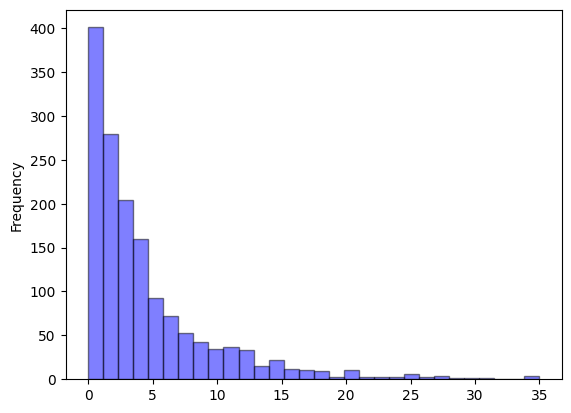

In [120]:
# Calculation of "close game" score
final_df['odds_diff'] = abs(final_df['HomeTeam_odds'] - final_df['AwayTeam_odds'])
final_df['odds_diff'].plot.hist(bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.show()

In [121]:
# show examples of close games
final_df[final_df['odds_diff'] < 0.5]

,Date,HomeTeam,HomeTeam_goals,AwayTeam_goals,AwayTeam,Attendance,FTR,Day,is_weekend,Season,Date_str,is_holiday,HomeTeam_odds,Draw_odds,AwayTeam_odds,odds_diff
2,2017-08-12,West Bromwich Albion,1,0,AFC Bournemouth,25011,H,5,1,2017_18,2017-08-12,0,2.65,3.21,3.02,0.37
11,2017-08-19,Burnley,0,1,West Bromwich Albion,19619,A,5,1,2017_18,2017-08-19,0,2.75,3.01,3.09,0.34
17,2017-08-20,Huddersfield Town,1,0,Newcastle United,24128,H,6,1,2017_18,2017-08-20,0,2.83,3.21,2.81,0.02
29,2017-08-27,West Bromwich Albion,1,1,Stoke City,22704,D,6,1,2017_18,2017-08-27,0,2.66,3.15,3.06,0.40
31,2017-09-09,Brighton & Hove Albion,3,1,West Bromwich Albion,30381,H,5,1,2017_18,2017-09-09,0,2.71,3.05,3.09,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,2024-05-02,Chelsea,2,0,Tottenham Hotspur,39086,H,3,0,2023_24,2024-05-02,0,2.46,4.04,2.68,0.22
1487,2024-05-03,Luton Town,1,1,Everton,11873,D,4,0,2023_24,2024-05-03,0,2.78,3.70,2.52,0.26
1493,2024-05-05,Brighton & Hove Albion,1,0,Aston Villa,31596,H,6,1,2023_24,2024-05-05,0,2.41,3.85,2.84,0.43
1508,2024-05-15,Manchester United,3,2,Newcastle United,73582,H,2,0,2023_24,2024-05-15,0,2.73,3.90,2.47,0.26


In [122]:
# 1 if the game is close, 0 if not
final_df['is_close_match'] = final_df['odds_diff'].apply(lambda x: 1 if x < 0.5 else 0)
final_df['is_close_match'].value_counts()

is_close_match
0    1339
1     181
Name: count, dtype: int64

In [123]:
# drop unnecessary columns
final_df = final_df.drop(columns=['HomeTeam_odds', 'Draw_odds', 'AwayTeam_odds', 'odds_diff', 'Date_str', 'HomeTeam_goals', 'AwayTeam_goals', 'FTR'])

In [124]:
team_to_stadium ={
    'Arsenal': 'Emirates Stadium',
    'Crystal Palace': 'Selhurst Park',
    'West Bromwich Albion': 'The Hawthorns',
    'Watford': 'Vicarage Road',
    'Chelsea': 'Stamford Bridge',
    'Everton': 'Goodison Park',
    'Brighton & Hove Albion': 'Amex Stadium',
    'Southampton': "St Mary's Stadium",
    'Manchester United': 'Old Trafford',
    'Newcastle United': "St James' Park",
    'AFC Bournemouth': 'Vitality Stadium',
    'Burnley': 'Turf Moor',
    'Leicester City': 'King Power Stadium',
    'Liverpool': 'Anfield',
    'Stoke City': 'bet365 Stadium',
    'Swansea City': "Swansea.com Stadium",
    'Huddersfield Town': "John Smith's Stadium",
    'Tottenham Hotspur': 'Tottenham Hotspur Stadium',
    'Manchester City': 'Etihad Stadium',
    'West Ham United': 'London Stadium',
    'Fulham': 'Craven Cottage',
    'Wolverhampton Wanderers': 'Molineux Stadium',
    'Cardiff City': 'Cardiff City Stadium',
    'Leeds United': 'Elland Road',
    'Aston Villa': 'Villa Park',
    'Brentford': 'Gtech Community Stadium',
    'Nottingham Forest': 'The City Ground',
    'Sheffield United': 'Bramall Lane',
    'Luton Town': 'Kenilworth Road'
}

stadium_capacity = {
    'Old Trafford': 74879,
    'Tottenham Hotspur Stadium': 62850,
    'London Stadium': 62500,
    'Anfield': 60705,
    'Emirates Stadium': 60704,
    'Etihad Stadium': 55017,
    "St James' Park": 52338,
    'Villa Park': 42682,
    'Stamford Bridge': 40853,
    'Goodison Park': 39571,
    "St Mary's Stadium": 32384,
    'King Power Stadium': 32273,
    'Molineux Stadium': 32050,
    'Amex Stadium': 31800,
    'The City Ground': 30445,
    'Selhurst Park': 26047,
    'Craven Cottage': 25700,
    'Vitality Stadium': 11329,
    'Gtech Community Stadium': 17250,
    'Elland Road': 37600,
    'Cardiff City Stadium': 33280,
    'Bramall Lane': 32702,
    'bet365 Stadium': 30109,
    'The Hawthorns': 26688,
    'Turf Moor': 21944,
    'Vicarage Road': 22200,
    'Swansea.com Stadium': 21088,
    'Kenilworth Road': 11800,
    "John Smith's Stadium": 24500
}

plt.figure(figsize=(20, 10))
final_df['Stadium'] = final_df['HomeTeam'].map(team_to_stadium)
final_df['Stadium_capacity'] = final_df['Stadium'].map(stadium_capacity)
final_df['Attendance'] = final_df['Attendance'].fillna(0)
final_df['Attendance'] = final_df['Attendance'].astype(int)
final_df['Attendance_percentage'] = round(final_df['Attendance'] / final_df['Stadium_capacity'] * 100 , 2)
final_df = final_df[['Season', 'Date', 'HomeTeam', 'AwayTeam', 'Stadium', 'Attendance_percentage', 'is_weekend', 'is_holiday', 'is_close_match']]
final_df

,Season,Date,HomeTeam,AwayTeam,Stadium,Attendance_percentage,is_weekend,is_holiday,is_close_match
0,2017_18,2017-08-11,Arsenal,Leicester City,Emirates Stadium,97.83,0,0,0
1,2017_18,2017-08-12,Crystal Palace,Huddersfield Town,Selhurst Park,97.70,1,0,0
2,2017_18,2017-08-12,West Bromwich Albion,AFC Bournemouth,The Hawthorns,93.72,1,0,1
3,2017_18,2017-08-12,Watford,Liverpool,Vicarage Road,91.92,1,0,0
4,2017_18,2017-08-12,Chelsea,Burnley,Stamford Bridge,101.87,1,0,0
...,...,...,...,...,...,...,...,...,...
1515,2023_24,2024-05-19,Chelsea,AFC Bournemouth,Stamford Bridge,97.24,1,0,0
1516,2023_24,2024-05-19,Crystal Palace,Aston Villa,Selhurst Park,96.71,1,0,0
1517,2023_24,2024-05-19,Liverpool,Wolverhampton Wanderers,Anfield,98.94,1,0,0
1518,2023_24,2024-05-19,Manchester City,West Ham United,Etihad Stadium,100.15,1,0,0


<Figure size 2000x1000 with 0 Axes>

In [125]:
teams_and_seasons = {}
for team in final_df['HomeTeam'].unique():
    seasons = final_df[final_df['HomeTeam'] == team]['Season'].unique()
    teams_and_seasons[team] = list(seasons)

In [92]:
# team positions across each season in the dataset
def build_allSeasons_team_positions(team_name):
    team_seasons_files = os.listdir('teams/' + team_name)
    team_seasons_files = [file for file in team_seasons_files if file != 'positions.csv' and file != 'weather.csv']
    positions_df = pd.DataFrame()

    for file in team_seasons_files:
        season_df = pd.read_csv('teams/' + team_name + '/' + file)
        season_df['Season'] = file.split('.')[0]
        season_df = season_df[['Season', 'Match', 'Position']]
        positions_df = pd.concat([positions_df, season_df])

    positions_df = positions_df.reset_index(drop=True)
    # shift the position by 1
    positions_df['Position'] = positions_df['Position'].shift(1)
    positions_df['Position'] = positions_df['Position'].fillna(0)
    positions_df.to_csv('teams/' + team_name + '/' + 'positions.csv', index=False)


for team in final_df['HomeTeam'].unique():
    build_allSeasons_team_positions(team)

In [126]:
# add dates to the positions dataframes
def add_dates_to_positions(team_name):
    positions_df = pd.read_csv('teams/' + team_name + '/' + 'positions.csv')
    team_fixtures = final_df[(final_df['HomeTeam'] == team_name) | (final_df['AwayTeam'] == team_name)]
    team_fixtures = team_fixtures[['Date', 'Season']]
    positions_df['Date'] = team_fixtures['Date'].tolist()
    return positions_df

for team in final_df['HomeTeam'].unique():
    positions_df = add_dates_to_positions(team)
    positions_df.to_csv('teams/' + team + '/' + 'positions.csv', index=False)

In [127]:
# merge the positions dataframes with the final_df
final_df['HomeTeam_position'] = 0
final_df['AwayTeam_position'] = 0

for row in final_df.itertuples():
    home_team = row.HomeTeam
    away_team = row.AwayTeam
    date = row.Date
    season = row.Season

    home_team_positions = pd.read_csv('teams/' + home_team + '/' + 'positions.csv')
    home_team_positions['Date'] = pd.to_datetime(home_team_positions['Date'])
    home_team_positions = home_team_positions[home_team_positions['Season'] == season]
    home_team_positions = home_team_positions[home_team_positions['Date'] == date]

    away_team_positions = pd.read_csv('teams/' + away_team + '/' + 'positions.csv')
    away_team_positions['Date'] = pd.to_datetime(away_team_positions['Date'])
    away_team_positions = away_team_positions[away_team_positions['Season'] == season]
    away_team_positions = away_team_positions[away_team_positions['Date'] == date]

    if not home_team_positions.empty:
        final_df.at[row.Index, 'HomeTeam_position'] = home_team_positions['Position'].values[0]
    if not away_team_positions.empty:
        final_df.at[row.Index, 'AwayTeam_position'] = away_team_positions['Position'].values[0]

In [128]:
final_df.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'Stadium',
       'Attendance_percentage', 'is_weekend', 'is_holiday', 'is_close_match',
       'HomeTeam_position', 'AwayTeam_position'],
      dtype='object')

In [129]:
final_df = final_df[['Season', 'Date', 'HomeTeam', 'AwayTeam', 'Stadium', 'is_weekend', 'is_holiday', 'is_close_match','HomeTeam_position', 'AwayTeam_position','Attendance_percentage']]
final_df.head(2)

,Season,Date,HomeTeam,AwayTeam,Stadium,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,Attendance_percentage
0,2017_18,2017-08-11,Arsenal,Leicester City,Emirates Stadium,0,0,0,0,0,97.83
1,2017_18,2017-08-12,Crystal Palace,Huddersfield Town,Selhurst Park,1,0,0,0,0,97.70


In [97]:
def convert_degrees2coordinates(degrees_string):
    """
    The convert_de function takes a string of the form 'dddmm.mmmmN' or 'dddmm.mmmmW' and returns
    a string of the form '-ddd.mmmmmmm'.  This is useful for converting coordinates in degrees, minutes, and decimal
    minutes to decimal degrees.

    Parameters
    ----------
      rees2coordinates(degrees_string
          Convert the string of degrees into a float

    Returns
    -------

      A string that is a number with a minus sign if the coordinate is west or south
    """
    if degrees_string.strip()[-1]=='W':
        return (f'-{degrees_string.strip()[:-2]}')
    else:
        return (f'{degrees_string.strip()[:-2]}')

In [130]:
# Adding stadium location and coordinates
wikipideia_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_Premier_League_stadiums')[0]
wikipideia_data = wikipideia_data[['Stadium', 'Capacity', 'Location', 'Coordinates', 'Club', 'Closed']]
wikipideia_data = wikipideia_data[wikipideia_data['Closed'].isnull()]
# keep only the teams in the final_df
wikipideia_data = wikipideia_data[wikipideia_data['Club'].isin(final_df['HomeTeam'].unique()) | wikipideia_data['Stadium'].isin(list(final_df['Stadium'].unique()) + ["Dean Court"])]
# correct the stadium names and club names
wikipideia_data['Club'] = wikipideia_data['Club'].replace({'Crystal Palace & Wimbledon': 'Crystal Palace', "Bournemouth": "AFC Bournemouth"})

#check if the clubs are the same
print(set(wikipideia_data['Club'].unique()) - set(final_df['HomeTeam'].unique()))
print(set(final_df['HomeTeam'].unique()) - set(wikipideia_data['Club'].unique()))

wikipideia_data['Stadium'] = wikipideia_data['Stadium'].replace({'Dean Court': 'Vitality Stadium', 'City Ground': 'The City Ground', "Brentford Community Stadium": "Gtech Community Stadium", 
                                                                 "London Stadium Formerly Olympic Stadium": "London Stadium","Swansea.com Stadium Formerly Liberty Stadium": "Swansea.com Stadium", 
                                                                 "King Power Stadium Formerly Walkers Stadium": "King Power Stadium", "bet365 Stadium Formerly Britannia Stadium": "bet365 Stadium",
                                                                 "Kirklees Stadium": "John Smith's Stadium", "Stadium of Light": "Stadium of Light", "Stadium of Light": "Stadium of Light",
                                                                 "City of Manchester Stadium" : "Etihad Stadium", "Falmer Stadium": "Amex Stadium"})

# check if the wikipideia_data are the same
print(set(wikipideia_data['Stadium'].unique()) - set(final_df['Stadium'].unique()))
print(set(final_df['Stadium'].unique()) - set(wikipideia_data['Stadium'].unique()))

# fill anfield coordinates with this template 52°59′18″N 002°10′32″W﻿ / ﻿52.98833°N 2.17556°W	
wikipideia_data.loc[wikipideia_data['Stadium'] == 'Anfield', 'Coordinates'] = "53°25′51″N 002°57′39″W﻿ / ﻿53.43083°N 2.96083°W"
wikipideia_data['Coordinates'] = wikipideia_data['Coordinates'].str.split('/').str[-1].str.strip().str.split(' ').apply(lambda stringCors:[elm.split()[-1] for elm in stringCors])
wikipideia_data['latitude'] = pd.to_numeric(wikipideia_data['Coordinates'].apply(
lambda lst: lst[0]).apply(convert_degrees2coordinates).str.encode('ascii', 'ignore').str.decode('ascii'),errors='coerce')
wikipideia_data['longitude'] = pd.to_numeric(wikipideia_data['Coordinates'].apply(
lambda lst: lst[-1]).apply(convert_degrees2coordinates).str.encode('ascii', 'ignore').str.decode('ascii'),errors='coerce')

# merge the final_df with the wikipideia_data
final_df = final_df.merge(wikipideia_data[['Stadium', 'latitude', 'longitude']], on='Stadium', how='left')
final_df.head(2)

set()
set()
set()
set()


,Season,Date,HomeTeam,AwayTeam,Stadium,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,Attendance_percentage,latitude,longitude
0,2017_18,2017-08-11,Arsenal,Leicester City,Emirates Stadium,0,0,0,0,0,97.83,51.55500,-0.10861
1,2017_18,2017-08-12,Crystal Palace,Huddersfield Town,Selhurst Park,1,0,0,0,0,97.70,51.39833,-0.08556


In [134]:
# Add match time to the final_df
import requests
import pandas as pd
from bs4 import BeautifulSoup

seasons = ['2017-2018', '2018-2019', '2022-2023', '2023-2024']
fixtures_times_df = pd.DataFrame()

for season in seasons:
    url = f"https://www.worldfootball.net/all_matches/eng-premier-league-{season}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"class": "standard_tabelle"})
    rows = table.find_all("tr")

    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 6:
            date = cols[0].text.strip()
            time = cols[1].text.strip()
            home_team = cols[2].text.strip()
            away_team = cols[4].text.strip()
            score = cols[5].text.strip()
            fixtures_times_df = pd.concat([fixtures_times_df, pd.DataFrame({'Date': [date], 'HomeTeam': [home_team], 'AwayTeam': [away_team], 'Time': [time]})], ignore_index=True)

fixtures_times_df['Date'] = pd.to_datetime(fixtures_times_df['Date'], dayfirst=True)
fixtures_times_df['Time'] = pd.to_datetime(fixtures_times_df['Time'], format='%H:%M').dt.time
# forward fill the date
fixtures_times_df['Date'] = fixtures_times_df['Date'].ffill()
# drop FC from the team names
fixtures_times_df['HomeTeam'] = fixtures_times_df['HomeTeam'].str.replace(' FC', '')
fixtures_times_df['AwayTeam'] = fixtures_times_df['AwayTeam'].str.replace(' FC', '')
fixtures_times_df

,Date,HomeTeam,AwayTeam,Time
0,2017-08-11,Arsenal,Leicester City,19:45:00
1,2017-08-12,Watford,Liverpool,12:30:00
2,2017-08-12,Chelsea,Burnley,15:00:00
3,2017-08-12,Crystal Palace,Huddersfield Town,15:00:00
4,2017-08-12,Everton,Stoke City,15:00:00
...,...,...,...,...
1515,2024-05-19,Crystal Palace,Aston Villa,16:00:00
1516,2024-05-19,Liverpool,Wolverhampton Wanderers,16:00:00
1517,2024-05-19,Luton Town,Fulham,16:00:00
1518,2024-05-19,Manchester City,West Ham United,16:00:00


In [135]:
# check if the teams are the same
print(set(fixtures_times_df['HomeTeam'].unique()) - set(final_df['HomeTeam'].unique()))
print(set(final_df['HomeTeam'].unique()) - set(fixtures_times_df['HomeTeam'].unique()))

# drop FC from the team names
fixtures_times_df['HomeTeam'] = fixtures_times_df['HomeTeam'].str.replace(' FC', '')
fixtures_times_df['AwayTeam'] = fixtures_times_df['AwayTeam'].str.replace(' FC', '')

# check if the teams are the same
print(set(fixtures_times_df['HomeTeam'].unique()) - set(final_df['HomeTeam'].unique()))
print(set(final_df['HomeTeam'].unique()) - set(fixtures_times_df['HomeTeam'].unique()))

# merge the two dataframes on Date, HomeTeam and AwayTeam
final_df = final_df.merge(fixtures_times_df, on=['Date', 'HomeTeam', 'AwayTeam'], how='left')
final_df = final_df[['Season', 'Date', 'Time', 'Stadium', 'latitude', 'longitude', 'HomeTeam', 'AwayTeam', 'is_weekend', 'is_holiday','is_close_match', 'HomeTeam_position', 'AwayTeam_position' ,'Attendance_percentage']]
final_df.head(3)

set()
set()
set()
set()


,Season,Date,Time,Stadium,latitude,longitude,HomeTeam,AwayTeam,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,Attendance_percentage
0,2017_18,2017-08-11,19:45:00,Emirates Stadium,51.55500,-0.10861,Arsenal,Leicester City,0,0,0,0,0,97.83
1,2017_18,2017-08-12,15:00:00,Selhurst Park,51.39833,-0.08556,Crystal Palace,Huddersfield Town,1,0,0,0,0,97.70
2,2017_18,2017-08-12,15:00:00,The Hawthorns,52.50917,-1.96389,West Bromwich Albion,AFC Bournemouth,1,0,1,0,0,93.72


In [101]:
def create_url(params):
    """
    The create_url function takes a dictionary of parameters and returns a url string.
    The function is used to create the url for the API call.
    
    
    Parameters
    ----------
        params
            Pass the parameters to the api
    
    Returns
    -------
    
        A string that is the url for a query to openmeteodata
    """
    url = "https://archive-api.open-meteo.com/v1/archive?"
    for k, v in params.items():
        if type(v) == list:  # noqa: E721
            url += f"{k}={','.join(v)}"
        else:
            url += f"{k}={v}"
        url += "&"
    return url[:-1]

def get_weather(latitude, longitude, start_date, end_date):
    
    """
    The get_weather function takes in a latitude, longitude, start_date and end_date.
    It then creates a url using the create_url function with the parameters passed into get_weather.
    The url is then used to make an API call to Weatherbit's weather API and returns hourly and daily dataframes.
    
    Parameters
    ----------
        latitude
            Specify the latitude of the location for which you want to get weather data
        longitude
            Specify the longitude of the location
        start_date
            Define the start date of the weather data to be retrieved
        end_date
            Specify the end date of the data to be retrieved
    
    Returns
    -------
    
        A tuple of two dataframes
    """
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "temperature_unit":'celsius',
        "hourly": ["temperature_2m", "precipitation", "rain", "weather_code"]
    }
    url = create_url(params)
    r = requests.get(url).json()
    df = pd.DataFrame()
    try:
        df = pd.DataFrame(r.get("hourly",[]), columns=r.get("hourly_units",[])).dropna()
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
        df.set_index('time',inplace=True)
    except Exception as e:
        pass
    return df

In [145]:
# create weather files for each team
for team in final_df['HomeTeam'].unique():
    team_df = final_df[(final_df['HomeTeam'] == team) | (final_df['AwayTeam'] == team)]
    start_date = team_df['Date'].min().strftime('%Y-%m-%d')
    end_date = team_df['Date'].max().strftime('%Y-%m-%d')
    latitude = team_df['latitude'].values[0]
    longitude = team_df['longitude'].values[0]
    weather_df = get_weather(latitude, longitude, start_date, end_date)
    weather_df.to_csv('teams/' + team + '/' + 'weather.csv')

In [136]:
# merge the weather data with the final_df
final_df['HomeTeam_weather_code'] = 0

for row in final_df.itertuples():
    home_team = row.HomeTeam
    away_team = row.AwayTeam
    date = row.Date
    time = row.Time
    # round the time to the previous hour
    time = time.replace(minute=0)

    home_team_weather = pd.read_csv('teams/' + home_team + '/' + 'weather.csv')
    home_team_weather['time'] = pd.to_datetime(home_team_weather['time'], errors='coerce')
    home_team_weather = home_team_weather[home_team_weather['time'].dt.date == date.date()]
    home_team_weather = home_team_weather[home_team_weather['time'].dt.time == time]

    if not home_team_weather.empty:
        final_df.at[row.Index, 'HomeTeam_weather_code'] = home_team_weather['weather_code'].values[0]

final_df.head(20)

,Season,Date,Time,Stadium,latitude,longitude,HomeTeam,AwayTeam,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,Attendance_percentage,HomeTeam_weather_code
0,2017_18,2017-08-11,19:45:00,Emirates Stadium,51.555000,-0.108610,Arsenal,Leicester City,0,0,0,0,0,97.83,3
1,2017_18,2017-08-12,15:00:00,Selhurst Park,51.398330,-0.085560,Crystal Palace,Huddersfield Town,1,0,0,0,0,97.70,3
2,2017_18,2017-08-12,15:00:00,The Hawthorns,52.509170,-1.963890,West Bromwich Albion,AFC Bournemouth,1,0,1,0,0,93.72,3
3,2017_18,2017-08-12,12:30:00,Vicarage Road,51.650000,-0.401670,Watford,Liverpool,1,0,0,0,0,91.92,2
4,2017_18,2017-08-12,15:00:00,Stamford Bridge,51.481670,-0.191110,Chelsea,Burnley,1,0,0,0,0,101.87,3
5,2017_18,2017-08-12,15:00:00,Goodison Park,53.438890,-2.966390,Everton,Stoke City,1,0,0,0,0,98.67,51
6,2017_18,2017-08-12,17:30:00,Amex Stadium,50.861822,-0.083278,Brighton & Hove Albion,Manchester City,1,0,0,0,0,95.64,3
7,2017_18,2017-08-12,15:00:00,St Mary's Stadium,50.905830,-1.391110,Southampton,Swansea City,1,0,0,0,0,97.11,3
8,2017_18,2017-08-13,16:00:00,Old Trafford,53.463060,-2.291390,Manchester United,West Ham United,1,0,0,0,0,100.07,3
9,2017_18,2017-08-13,13:30:00,St James' Park,54.975560,-1.621670,Newcastle United,Tottenham Hotspur,1,0,0,0,0,99.50,2


In [137]:
# Create a binary column for extreme weather
final_df['had_extreme_weather'] = final_df['HomeTeam_weather_code'].apply(lambda x: 1 if x >= 50 else 0)

# drop months from April to October (eliminate end or start of the season effects)
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df = final_df[~final_df['Date'].dt.month.isin([4, 5, 6, 7, 8, 9, 10])]

# drop the rows with 0 attendance percentage and change above 100 to 100
final_df['Attendance_percentage'] = np.where(final_df['Attendance_percentage'] > 100, 100, final_df['Attendance_percentage'])
final_df = final_df[final_df['Attendance_percentage'] != 0]

final_df = final_df[['Season', 'Date', 'Time', 'Stadium', 'latitude', 'longitude', 'HomeTeam', 'AwayTeam', 'is_weekend', 'is_holiday','is_close_match', 'HomeTeam_position', 'AwayTeam_position', 'had_extreme_weather', 'Attendance_percentage']]

final_df.to_csv('final_df.csv', index=False)

In [141]:
# Add "if_top_game" binary column: if both teams are in the classical top 6
top_6 = ['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea', 'Arsenal', 'Tottenham Hotspur']
final_df['is_top_match'] = final_df.apply(lambda x: 1 if x['HomeTeam'] in top_6 and x['AwayTeam'] in top_6 else 0, axis=1)

final_df = final_df[['Season', 'Date', 'Time', 'Stadium', 'latitude', 'longitude', 'HomeTeam', 'AwayTeam', 'is_weekend', 'is_holiday','is_close_match', 'HomeTeam_position', 'AwayTeam_position', 'is_top_match', 'had_extreme_weather', 'Attendance_percentage']]

final_df.to_csv('final_df.csv', index=False)

In [142]:
final_df = pd.read_csv('final_df.csv')
final_df['had_extreme_weather'].value_counts()

had_extreme_weather
0    557
1    200
Name: count, dtype: int64

In [147]:
final_df['has_min_one_top_club'] = final_df.apply(lambda x: 1 if x['HomeTeam'] in top_6 or x['AwayTeam'] in top_6 else 0, axis=1)
final_df['hour'] = pd.to_datetime(final_df['Time']).dt.hour.astype(str)
final_df

,Season,Date,Time,Stadium,latitude,longitude,HomeTeam,AwayTeam,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,is_top_match,had_extreme_weather,Attendance_percentage,one_top_club,hour,has_min_one_top_club
0,2017_18,2017-11-04,15:00:00,John Smith's Stadium,53.654170,-1.76833,Huddersfield Town,West Bromwich Albion,1,0,1,11,14,0,0,98.65,0,15,0
1,2017_18,2017-11-04,15:00:00,St James' Park,54.975560,-1.62167,Newcastle United,AFC Bournemouth,1,0,0,9,19,0,0,99.81,0,15,0
2,2017_18,2017-11-04,15:00:00,St Mary's Stadium,50.905830,-1.39111,Southampton,Burnley,1,0,0,9,7,0,1,94.15,0,15,0
3,2017_18,2017-11-04,15:00:00,Swansea.com Stadium,51.642780,-3.93472,Swansea City,Brighton & Hove Albion,1,0,1,17,12,0,1,98.74,0,15,0
4,2017_18,2017-11-04,17:30:00,London Stadium,51.538610,-0.01639,West Ham United,Liverpool,1,0,0,16,6,0,0,91.14,1,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2023_24,2024-03-30,20:00:00,Gtech Community Stadium,51.490825,-0.28870,Brentford,Manchester United,1,0,0,16,6,0,0,99.35,1,20,1
753,2023_24,2024-03-30,15:00:00,Bramall Lane,53.370280,-1.47083,Sheffield United,Fulham,1,0,0,19,12,0,0,91.77,0,15,0
754,2023_24,2024-03-30,15:00:00,Tottenham Hotspur Stadium,51.604720,-0.06639,Tottenham Hotspur,Luton Town,1,0,0,5,18,0,0,97.91,1,15,1
755,2023_24,2024-03-31,14:00:00,Anfield,53.430830,-2.96083,Liverpool,Brighton & Hove Albion,1,1,0,2,8,0,0,98.94,1,14,1


In [148]:
final_df = final_df[['Season', 'Date', 'hour', 'Stadium', 'latitude', 'longitude', 'HomeTeam', 'AwayTeam', 'is_weekend', 'is_holiday','is_close_match', 'HomeTeam_position', 'AwayTeam_position', 'is_top_match', 'has_min_one_top_club', 'had_extreme_weather', 'Attendance_percentage']]
final_df.to_csv('final_df.csv', index=False)